<a href="https://colab.research.google.com/github/Narasimhapapineni/icp/blob/main/Copy_of_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
#importing necessary libraries

import pandas as pandas
import matplotlib.pyplot as pyPlot
import numpy as numPY
import seaborn as seaBorn
import tensorflow as tensorFlow
import tensorflow_hub as tensorFlowHub
from tensorflow.keras import models
from tensorflow.keras import layers



In [61]:
pandas.set_option('display.max_colwidth', None)


In [62]:
# importing the dataset

from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/Data.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
#loading dataset

#dataset_columns = ["target", "ids", "date", "flag", "user", "text"]
df = pandas.read_csv(path,encoding ='ISO-8859-1', skipinitialspace=True)

In [64]:
#checking the available GPU

from tensorflow.python.client import device_lib

tensorFlow.test.gpu_device_name()

'/device:GPU:0'

In [65]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [67]:
# Check for null values
df.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

B    357
M    212
Name: diagnosis, dtype: int64


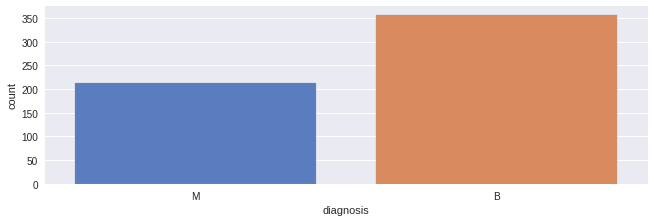

In [68]:
# class distribution ploting based on diagnosis values
print(df['diagnosis'].value_counts())
seaBorn.catplot(x="diagnosis", kind="count", palette="muted", edgecolor=".6", data=df, height=3, aspect=3)

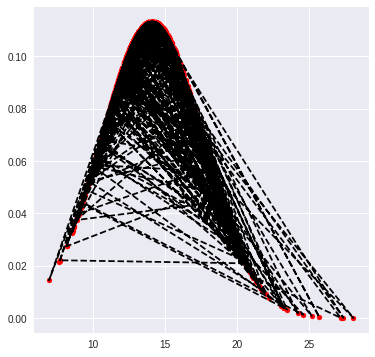

In [70]:
#trying to show data graph based an columns numeric values
def pdf(x):
    mean = numPY.mean(x)
    std = numPY.std(x)
    y_out = 1/(std * numPY.sqrt(2 * numPY.pi)) * numPY.exp( - (x - mean)**2 / (2 * std**2))
    return y_out
x = df['radius_mean'] 
y = pdf(x)
pyPlot.style.use('seaborn')
pyPlot.figure(figsize = (6, 6))
pyPlot.plot(x, y, color = 'black',
         linestyle = 'dashed') 
pyPlot.scatter( x, y, marker = 'o', s = 25, color = 'red')
pyPlot.show()

0      17.99
1      20.57
2      19.69
3      11.42
4      20.29
       ...  
564    21.56
565    20.13
566    16.60
567    20.60
568     7.76
Name: radius_mean, Length: 569, dtype: float64


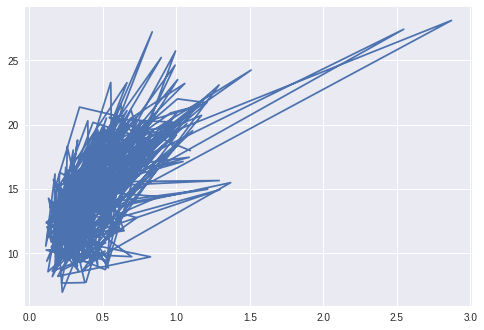

In [30]:
#trying ti show graph based on coulmns name 
X, Y = [], []

for line in df['radius_mean']:
  Y.append(float(line))
for line in df['radius_se']:
  X.append(float(line))
pyPlot.plot(X, Y)
pyPlot.show()